In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.close('all')

data = pd.read_csv("Data1.csv")

Setting date as an index and plotting data depending on the date.

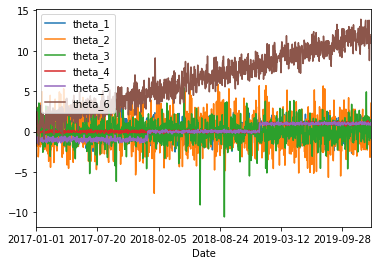

In [27]:
data.rename(columns={'Unnamed: 0':'Date'}, inplace=True)
data_timeframe = data.set_index('Date')

data_timeframe.plot()

Using melt method in order to create histograms. This process maps values only to proper variables and no longer the date.

variable      value
0     theta_1   0.756936
1     theta_1   0.767089
2     theta_1   0.404544
3     theta_1   1.313957
4     theta_1   0.209862
...       ...        ...
6565  theta_6  11.755980
6566  theta_6  11.397092
6567  theta_6  10.918941
6568  theta_6  11.140722
6569  theta_6  11.989975

[6570 rows x 2 columns]


<Figure size 432x288 with 0 Axes>

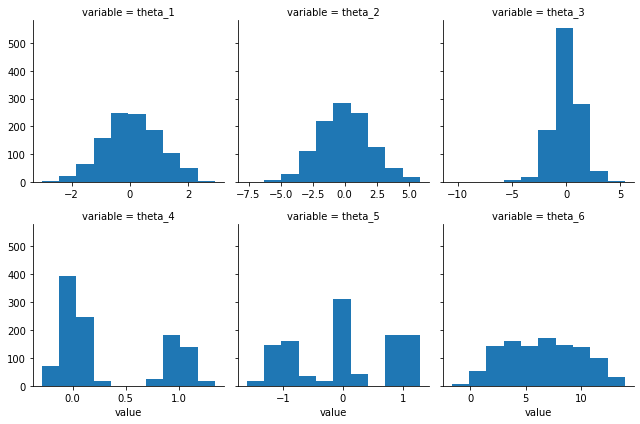

In [28]:
data_melt = data_timeframe.melt()
print(data_melt)

plt.figure()
grid = sns.FacetGrid(data_melt, col="variable",  sharex=False, col_wrap=3)
grid.map(plt.hist, "value")

Histrograms show us, for every variable, how many times a given value occurs. After proper rescaling of these plots (total occurences should add up to 1), the information about probability of occurence can be pulled out.

The KDE plot visible below gives us information of probability denisty distribution. It is very similar to histogram - more smoothed out and with small bin sizes.

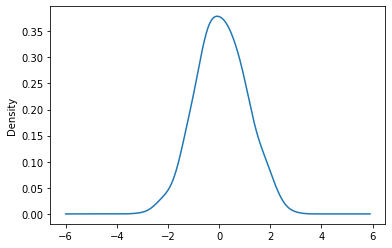

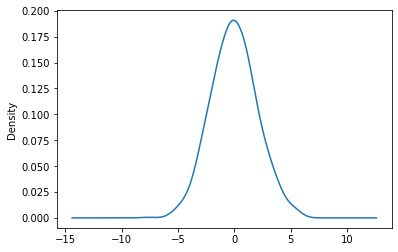

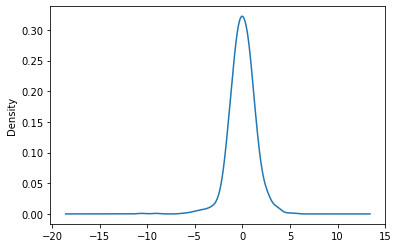

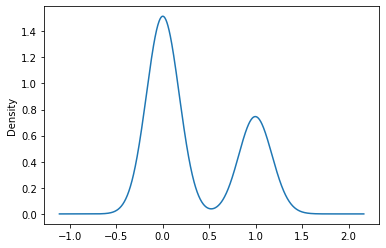

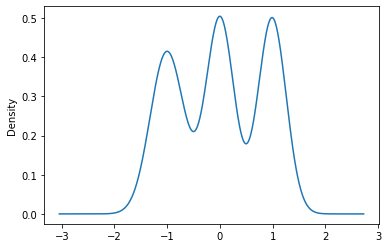

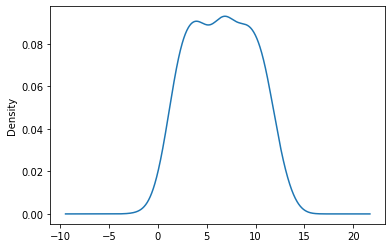

In [29]:
theta_1_series = pd.Series(data_timeframe['theta_1'])
theta_2_series = pd.Series(data_timeframe['theta_2'])
theta_3_series = pd.Series(data_timeframe['theta_3'])
theta_4_series = pd.Series(data_timeframe['theta_4'])
theta_5_series = pd.Series(data_timeframe['theta_5'])
theta_6_series = pd.Series(data_timeframe['theta_6'])

plt.figure()
theta_1_series.plot.kde(bw_method=0.3)
plt.figure()
theta_2_series.plot.kde(bw_method=0.3)
plt.figure()
theta_3_series.plot.kde(bw_method=0.3)
plt.figure()
theta_4_series.plot.kde(bw_method=0.3)
plt.figure()
theta_5_series.plot.kde(bw_method=0.3)
plt.figure()
theta_6_series.plot.kde(bw_method=0.3)

Analysing data just for year 2018.

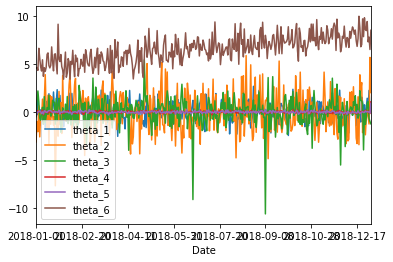

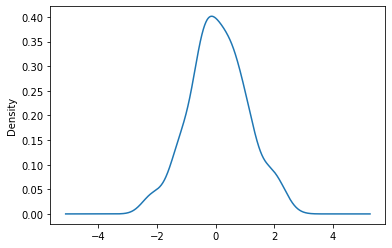

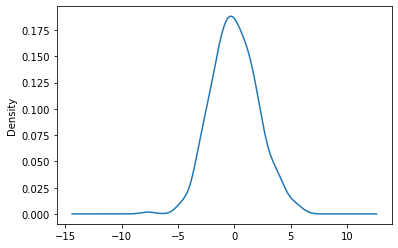

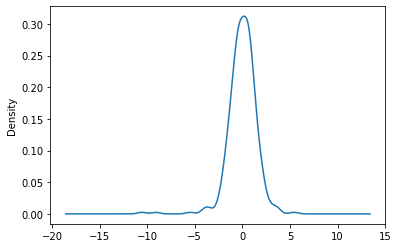

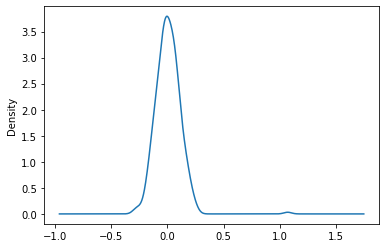

In [30]:
data_timeframe_trimmed = data_timeframe['2018-01-01':'2019-01-01']
data_timeframe_trimmed.plot()

theta_1_series = pd.Series(data_timeframe_trimmed['theta_1'])
theta_2_series = pd.Series(data_timeframe_trimmed['theta_2'])
theta_3_series = pd.Series(data_timeframe_trimmed['theta_3'])
theta_4_series = pd.Series(data_timeframe_trimmed['theta_4'])

plt.figure()
theta_1_series.plot.kde(bw_method=0.3)
plt.figure()
theta_2_series.plot.kde(bw_method=0.3)
plt.figure()
theta_3_series.plot.kde(bw_method=0.3)
plt.figure()
theta_4_series.plot.kde(bw_method=0.3)

We can see that for theta_4 value is reaching almost 4, much more as related to other variables, because most of the values assigned to this variable is contained in smaller range - about -0.3;0.3.